<a href="https://colab.research.google.com/github/Abd-elr4hman/Machine-Learning-Algorithms/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(4)

def euclidean_dis(x1,x2):
  return np.sqrt(np.sum((x1-x2) ** 2))

In [35]:
class K_means:
  """
    A class used to implement K-means alogarithm for clustering 

    Attributes
    ----------
    k : int
        number of clusters 
    iterations : int
        number of iterations to run the alogarithims
    clusters : list of ndarrays
        list of lists, contains a list for each cluster, 
        each cluster list contains the indices of associated traning examples
    centroids : list of ndarrays
        contains k lists each list represents a centroid feature vector
    n_examples : int 
        number of examples in dataset
    n_features : int
        number of features for each example

    Methods
    -------
    predict(x)
        predicts a cluster label for each training example
    get_cluster_labels(clusters)
        returns the assigned cluster label for each example
    create_clusters(centroids)
        associates each example with the nearest cluster,
        returns list of example indices for each cluster
    closest_centroid(example, centroids)
        Calculates euclidean distance from each example to centroids, 
        then return the index of the nearest centroid
    update_centroids(clusters)
        Calculates the mean of all examples associated with a cluster centroid,
        then assigns the cluster centroid to the mean.
    is_converged(centroids_old, centroids)
        calculates the euclidean distance between centroids_old and centroids,
        return True if distance is zero
  """

  def __init__(self, k=5, iterations=100):
    self.k= k
    self.iterations= iterations

    # list of example indecies
    self.clusters= [[] for _ in range(self.k)]
    # 
    self.centroids= []

  def predict(self, x):
    """predicts a cluster label for each training example

    Parameters
    ----------
    x : list of ndarrays
        list of examples that contain feature vector for each example

    Returns
    -------
    list of ndarrays
        list of size n_examples that contain cluster index associated with...
        each example
    """
    
    self.x= x
    self.n_examples, self.n_features= x.shape

    # initialize centroids
    random_ex_indices= np.random.choice(self.n_examples, self.k, replace= False)
    self.centroids= [self.x[index] for index in random_ex_indices]

    for _ in range(self.iterations):
      # update clusters
      self.clusters= self.create_clusters(self.centroids)

      # update centroids
      centroids_old= self.centroids
      self.centroids= self.update_centroids(self.clusters)

      # check if converged
      if self.is_converged(centroids_old, self.centroids):
          break

    # return cluster labels
    return self.get_cluster_labels(self.clusters)

  def get_cluster_labels(self, clusters):
    """returns the assigned cluster label for each example

    Parameters
    ----------
    clusters : list of ndarrays
        list of lists, contains a list for each cluster, 
        each cluster list contains the indices of associated traning examples

    Returns
    -------
    list of ndarrays
        list of size n_examples that contain cluster index associated with...
        each example
    """

    labels= np.empty(self.n_examples)
    for cluster_index, cluster in enumerate(clusters):
      for example_index in cluster:
        labels[example_index]= cluster_index
    return labels


  def create_clusters(self, centroids):
    """associates each example with the nearest cluster,
     returns list of example indices for each cluster

    Parameters
    ----------
    centroids : list of ndarrays
        contains k lists each list represents a centroid feature vector

    Returns
    -------
    list of ndarrays
        list of lists, contains a list for each cluster, 
        each cluster list contains the indices of associated traning examples
    """

    # list of example indecies
    clusters= [[] for _ in range(self.k)]
    
    for index, example in enumerate(self.x):
      centroid_index= self.closest_centroid(example, centroids)
      clusters[centroid_index].append(index)
    return clusters


  def closest_centroid(self, example, centroids):
    """Calculates euclidean distance from each example to centroids, 
    then return the index of the nearest centroid

    Parameters
    ----------
    example : list of ndarrays
        contains feature vector of size n_features
    centroids : list of ndarrays 
        contains k lists each list represents a centroid feature vector

    Returns
    -------
    int 
        index of the closest centroid
    """

    distances= [euclidean_dis(example, point)  for point in centroids]
    closest_index= np.argmin(distances)
    return closest_index
    

  def update_centroids(self, clusters):
    """Calculates the mean of all examples associated with a cluster centroid,
    then assigns the cluster centroid to the mean.

    Parameters
    ----------
    clusters : list of ndarrays
        list of lists, contains a list for each cluster, 
        each cluster list contains the indices of associated traning examples

    Returns
    -------
    list of ndarrays 
        contains k lists each list represents a centroid feature vector
    """

    centroids= np.zeros((self.k, self.n_features))
    for cluster_index, cluster in enumerate(clusters):
      cluster_mean= np.mean(self.x[cluster], axis=0)
      centroids[cluster_index]= cluster_mean
    return centroids


  def is_converged(self, centroids_old, centroids):
    """calculates the euclidean distance between centroids_old and centroids,
    return True if distance is zero

    Parameters
    ----------
    centroids_old : list of ndarrays
        contains k lists each list represents a centroid feature vector
    centroids : list of ndarrays 
        contains k lists each list represents a centroid feature vector

    Returns
    -------
    bool 
        True if centroids did not move
    """
    distances= [euclidean_dis(centroids_old[i], centroids[i]) for i in range(self.k)]
    return sum(distances) == 0



  def calculate_cost(self):
    distances= []
    for cluster_index, cluster in enumerate(self.clusters):
      for example_index in cluster:
        for_each_example= euclidean_dis(self.centroids[cluster_index], self.x[example_index])
        distances.append(for_each_example)
    return np.sum(np.array(distances) ** 2)
        

In [10]:
x,y= datasets.make_blobs(n_samples=500, n_features=2, centers=4, shuffle= True, random_state=42)
print(x.shape)
print(y.shape)


(500, 2)
(500,)


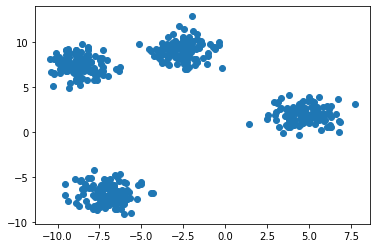

In [11]:
fig, ax= plt.subplots()
ax.scatter(x[:,0],x[:, 1])

In [31]:
k=K_means(k=4, iterations=150)
y_pred= k.predict(x)
print(y_pred.shape)


(500,)


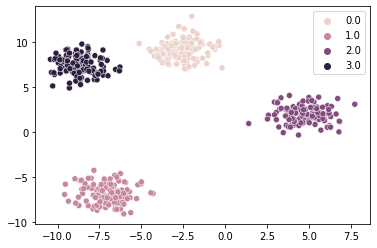

In [32]:
sns.scatterplot(x= x[:,0], y= x[:, 1], data= x, hue= y_pred)

In [60]:
# Choosing suitable K value
costs=[]
for i in range(1,7):
  k=K_means(k=i, iterations=150)
  k.predict(x)
  cost= k.calculate_cost()
  costs.append(cost)

print(costs)



[33903.904151021066, 16886.43884702867, 3426.257238005966, 948.8903433376543, 861.7765124380562, 767.7745192083723]


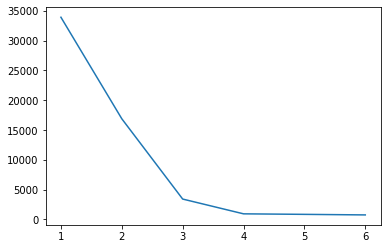

In [61]:
fig, ax= plt.subplots()
ax.plot(range(1,7), costs)